In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

In [2]:
adata  = sc.read_visium("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\sma\\sma\\V11T16-085\\V11T16-085_C1\\output_data\\V11T16-085_C1_RNA\\outs")

I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


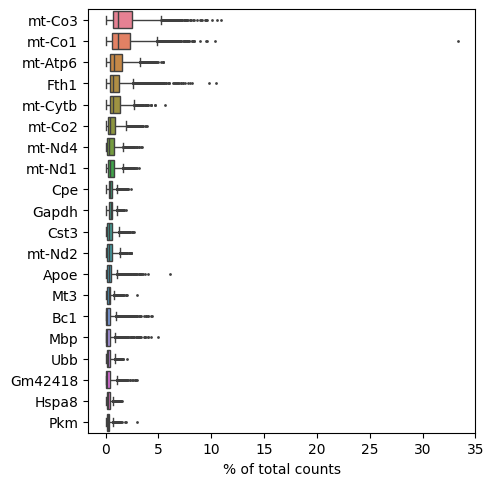

Number of cells after min count filter: 2382
Number of cells after max count filter: 2382
Number of cells after MT filter: 2382
Number of cells after gene filter: 1841
Number of genes after cell filter: 13467


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_simple.py:160: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [3]:
adata.var_names_make_unique()
adata
sc.pl.highest_expr_genes(adata, n_top=20)
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['mt_frac'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['total_counts'] = adata.X.sum(axis=1).A1
sc.pp.filter_cells(adata, min_counts = 1000)
print(f'Number of cells after min count filter: {adata.n_obs}')
sc.pp.filter_cells(adata, max_counts = 35000)
print(f'Number of cells after max count filter: {adata.n_obs}')
adata = adata[adata.obs['mt_frac'] < 0.2]
print(f'Number of cells after MT filter: {adata.n_obs}')
sc.pp.filter_cells(adata, min_genes = 1000)
print(f'Number of cells after gene filter: {adata.n_obs}')
sc.pp.filter_genes(adata, min_cells=10)
print(f'Number of genes after cell filter: {adata.n_vars}')

In [4]:
adata

AnnData object with n_obs × n_vars = 1841 × 13467
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
sc.pp.normalize_total(adata, inplace = True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata,n_neighbors=100)

sc.tl.umap(adata)
sc.tl.leiden(adata, key_added='clusters')

I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
C:\Users\28123\AppData\Local\Temp\ipykernel_2448\4067351581.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added='clusters')


-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.1
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
h5py                        3.11.0
idna                        3.7
igraph                      0.11.4
ipykernel                   6.29.4
ipywidgets                  8.1.2
isoduration                 N

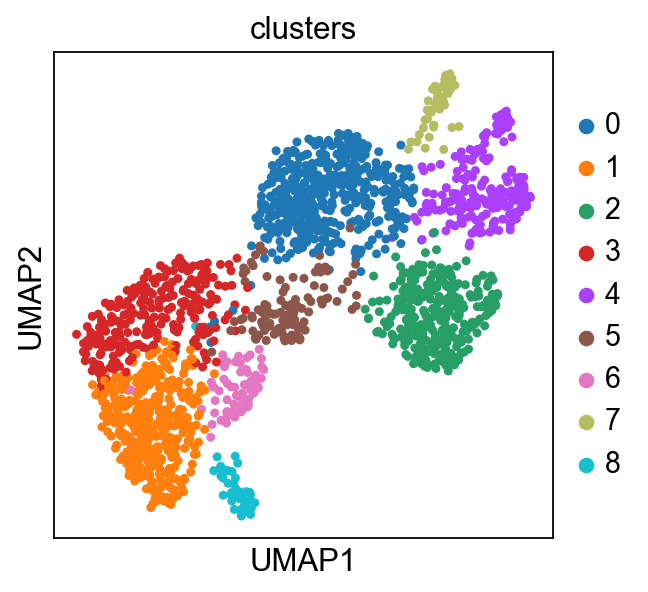

In [6]:
plt.rcParams['figure.figsize']=(8,8)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata, color='clusters', palette=sc.pl.palettes.default_20)

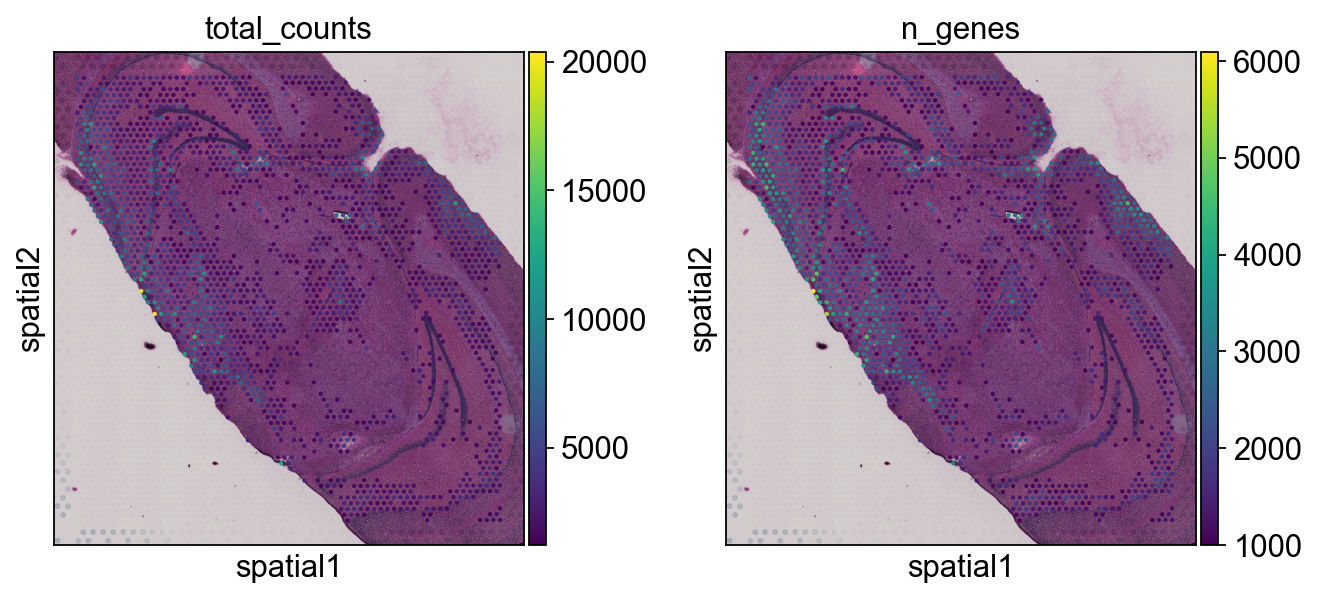

In [7]:
sc.pl.spatial(adata, img_key = "hires",color=['total_counts', 'n_genes'])

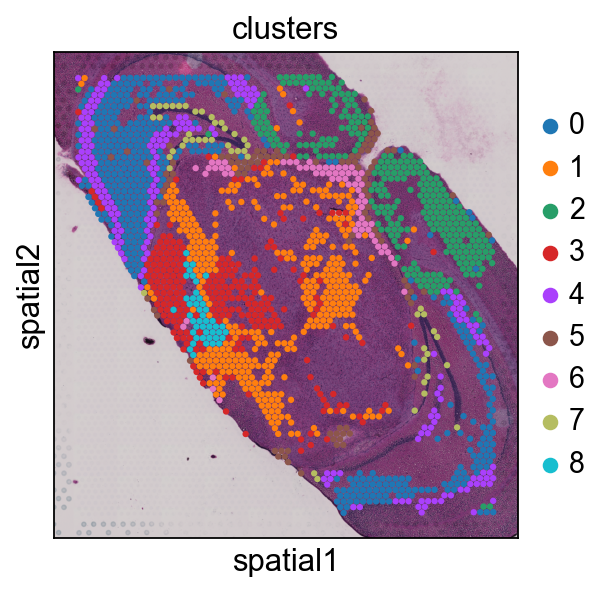

In [8]:
sc.pl.spatial(adata, img_key = "hires", color="clusters", size=1.5)

In [9]:
adata.write("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\sma\\sma\\sma\\sma\\V11T16-085\\V11T16-085_C1\\output_data\\V11T16-085_C1_RNA\\outs\\V11T16-085_C1_RNA.h5ad")

FileNotFoundError: [Errno 2] Unable to synchronously create file (unable to open file: name = 'I:\mutiomics\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\sma\sma\sma\sma\V11T16-085\V11T16-085_C1\output_data\V11T16-085_C1_RNA\outs\V11T16-085_C1_RNA.h5ad', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [10]:
adata.var_names_make_unique()